In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from aeon.analysis.utils import visits
import aeon.io.api as aeon
from functools import partial

In [2]:
from dotmap import DotMap
import aeon.schema.core as stream
import aeon.schema.foraging as foraging
from aeon.io.device import Device
import aeon.io.reader as _reader

def globalTrigger(pattern):
    """Raw global trigger notifications reported by video controller device."""
    return { "GlobalTrigger": _reader.Harp(f"{pattern}_32_*", ['value']) }

def heartbeat(pattern):
    """Heartbeat event for Harp devices."""
    return { "Heartbeat": _reader.Harp(f"{pattern}_8_*", ['value']) }

presocial = DotMap([
    Device("ClockSynchronizer", heartbeat),
    Device("Metadata", stream.metadata),
    Device("ExperimentalMetadata", stream.environment, stream.messageLog),
    Device("VideoController", globalTrigger),
    Device("CameraTop", stream.video, stream.position, foraging.region),
    Device("CameraEast", stream.video),
    Device("CameraNest", stream.video),
    Device("CameraNorth", stream.video),
    Device("CameraPatch1", stream.video),
    Device("CameraPatch2", stream.video),
    Device("CameraSouth", stream.video),
    Device("CameraWest", stream.video),
    Device("Nest", foraging.weight),
    Device("Patch1", foraging.patch),
    Device("Patch2", foraging.patch)
])

### Presocial 0.1 ([#236](https://github.com/SainsburyWellcomeCentre/aeon_experiments/issues/236))

In [3]:
root = '/ceph/aeon/aeon/data/raw/AEON3/presocial0.1/'
events = aeon.load(root, presocial.ExperimentalMetadata.SubjectState)                           # load all sessions

In [4]:
sessions = events[events.id.str.startswith('BAA-1103050')]
if len(sessions) % 2 != 0:                                            # if number of sessions don't pair up
    sessions = sessions.drop(sessions.index[-1])                      #   drop last session (might be ongoing)
sessions = visits(sessions, onset='Enter', offset='Exit')              # compute session duration
sessions

,id,weight_enter,weight_exit,enter,exit,duration
0,BAA-1103050,23.9,23.9,2023-02-28 16:37:28.423999786,2023-02-28 19:18:06.380000114,0 days 02:40:37.956000328
1,BAA-1103050,23.200001,<NA>,2023-03-01 16:35:10.480000019,NaT,NaT
2,BAA-1103050,25.6,24.0,2023-03-07 08:49:39.616000175,2023-03-07 11:51:46.423999786,0 days 03:02:06.807999611
3,BAA-1103050,23.6,23.299999,2023-03-08 12:26:32.992000103,2023-03-08 15:45:32.464000225,0 days 03:18:59.472000122
4,BAA-1103050,22.6,24.299999,2023-03-09 15:31:07.239999771,2023-03-09 18:19:16.271999836,0 days 02:48:09.032000065
5,BAA-1103050,23.200001,23.9,2023-03-10 09:41:48.783999920,2023-03-10 12:55:18.340000153,0 days 03:13:29.556000233
6,BAA-1103050,23.5,24.9,2023-03-23 14:30:26.423999786,2023-03-23 17:29:17.032000065,0 days 02:58:50.608000279
7,BAA-1103050,23.9,25.4,2023-03-24 09:11:06.288000107,2023-03-24 10:52:57.032000065,0 days 01:41:50.743999958
8,BAA-1103050,22.299999,25.6,2023-03-30 11:28:04.032000065,2023-03-30 14:33:36.527999878,0 days 03:05:32.495999813
9,BAA-1103050,21.4,26.5,2023-03-31 11:38:54.024000168,2023-03-31 14:40:14.460000038,0 days 03:01:20.435999870


In [5]:
tstart = sessions.iloc[12].enter
tend = sessions.iloc[12].exit
trialdata = partial(aeon.load, root, start=tstart, end=tend) 

In [6]:
patch1 = trialdata(presocial.Patch1.Encoder)
patch2 = trialdata(presocial.Patch2.Encoder)
cameraPatch1 = trialdata(presocial.CameraPatch1.Video)
hb = trialdata(presocial.ClockSynchronizer.Heartbeat)
video = trialdata(presocial.VideoController.GlobalTrigger)
hb['time'] = hb.index.values
cameraPatch1['time'] = cameraPatch1.index.values
video['time'] = video.index.values
patch1['time'] = patch1.index.values
patch2['time'] = patch2.index.values

Timedelta('0 days 00:02:35')

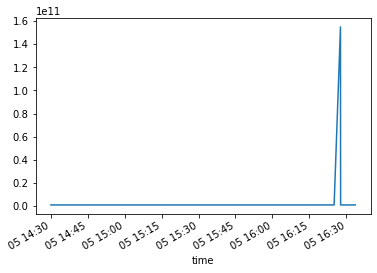

In [12]:
# Difference between main clock synchronizer heartbeats
hb.time.diff().plot()
hb.time.diff().max()

Timedelta('0 days 00:02:33.329984188')

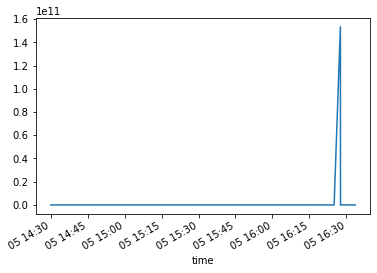

In [13]:
# Difference between patch1 wheel sample timestamps
patch1.time.diff().plot()
patch1.time.diff().max()

Timedelta('0 days 00:02:33.232000351')

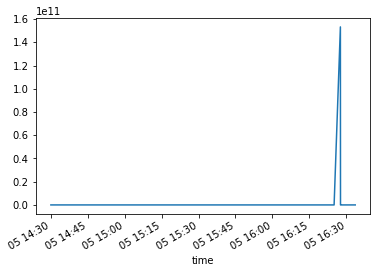

In [14]:
# Difference between patch2 wheel sample timestamps
patch2.time.diff().plot()
patch2.time.diff().max()

Timedelta('0 days 00:02:40.239999771')

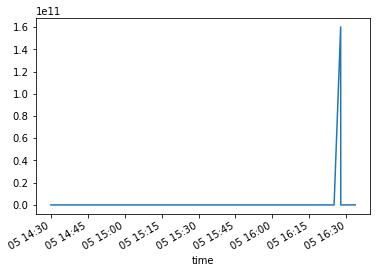

In [15]:
# Difference between video controller global frame trigger timestamps
video.time.diff().plot()
video.time.diff().max()

Timedelta('0 days 00:02:40.213748840')

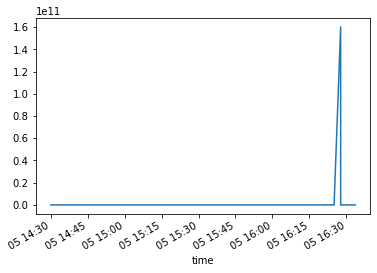

In [17]:
# Difference between individual frame hardware timestamps
cameraPatch1.hw_timestamp.diff().plot()
pd.Timedelta(cameraPatch1.hw_timestamp.diff().max())